In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

#sns.set_theme()

In [2]:
a = 12
N = 1000

theta = np.zeros(N)
theta[:int(N/4)] = np.linspace(0, np.pi / 2, int(N/4))
theta[int(N/4):2*int(N/4)] = np.linspace(np.pi / 2, 0, int(N/4))
theta[2*int(N/4):3*int(N/4)] = np.linspace(0, np.pi / 2, int(N/4))
theta[3*int(N/4):] = np.linspace(np.pi / 2, 0, int(N/4))

x = np.zeros(N)
y = np.zeros(N)

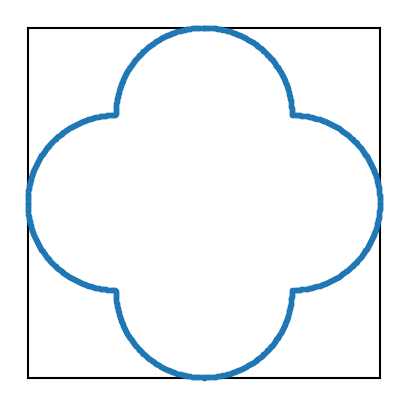

In [18]:
wa = 1
wb = 1
proportion = wb / wa
alpha = np.arctan(proportion)

for i in range(N):
    theta_i = theta[i]
    
    rho = wa * a * np.sin(theta_i)
    if theta_i < alpha:
        rho = wb * a * np.cos(theta_i)
    
    if i < N/4:
        x[i] = rho * np.cos(theta_i)
        y[i] = rho * np.sin(theta_i)
        continue
    if i < N/2:
        x[i] = rho * np.cos(theta_i)
        y[i] = - rho * np.sin(theta_i)
        continue
    if i < 3*N/4:
        x[i] = - rho * np.cos(theta_i)
        y[i] = - rho * np.sin(theta_i)
        continue
    x[i] = - rho * np.cos(theta_i)
    y[i] = rho * np.sin(theta_i)
    

fig = plt.figure(figsize=(5, 5))

#plt.xlim(-0.1, wb*a+0.1)
#plt.ylim(-0.1, wa*a+0.1)

plt.plot([-wb*a, wb*a], [wa*a, wa*a], 'k')
plt.plot([-wb*a, wb*a], [-wa*a, -wa*a], 'k')
plt.plot([-wb*a, -wb*a], [-wa*a, wa*a], 'k')
plt.plot([wb*a, wb*a], [-wa*a, wa*a], 'k')

plt.plot(x, y, '.')

plt.axis('off')

plt.savefig(f'{wa}_{wb}.eps')